 Netflix Data Visualization

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

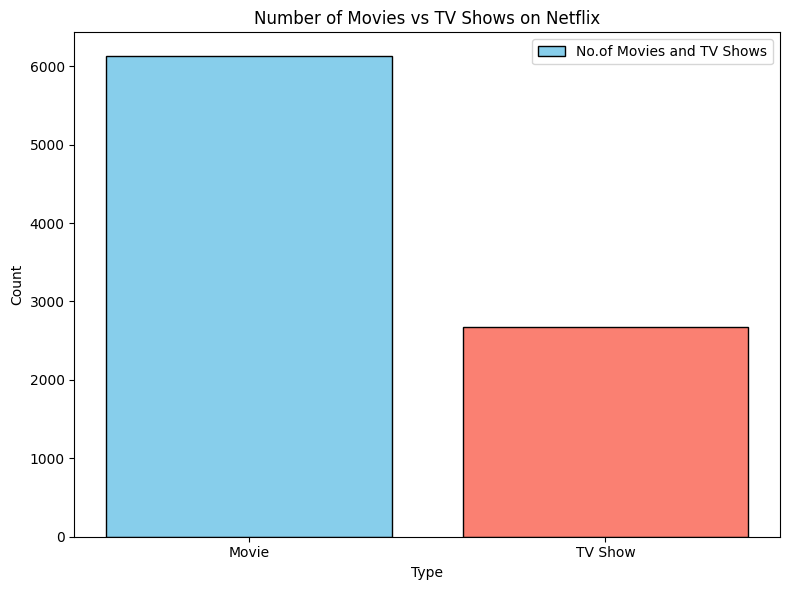

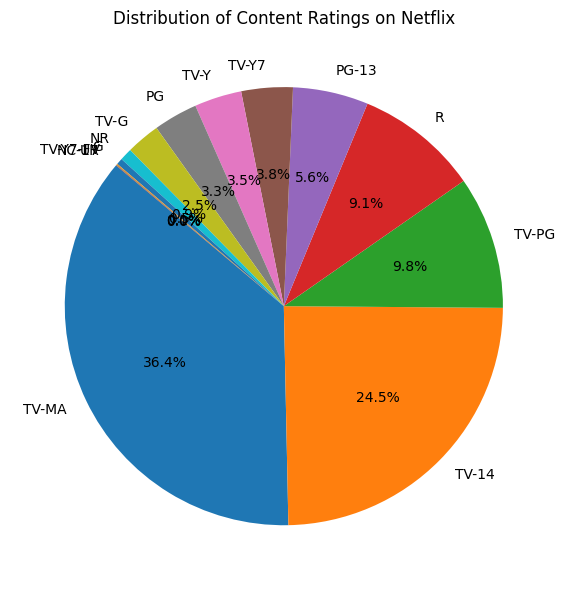

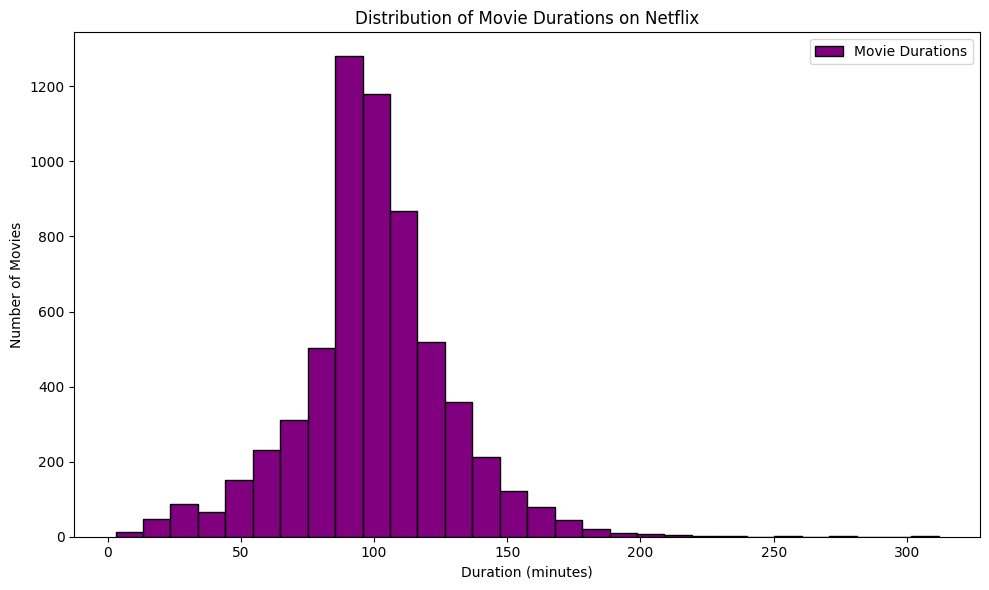

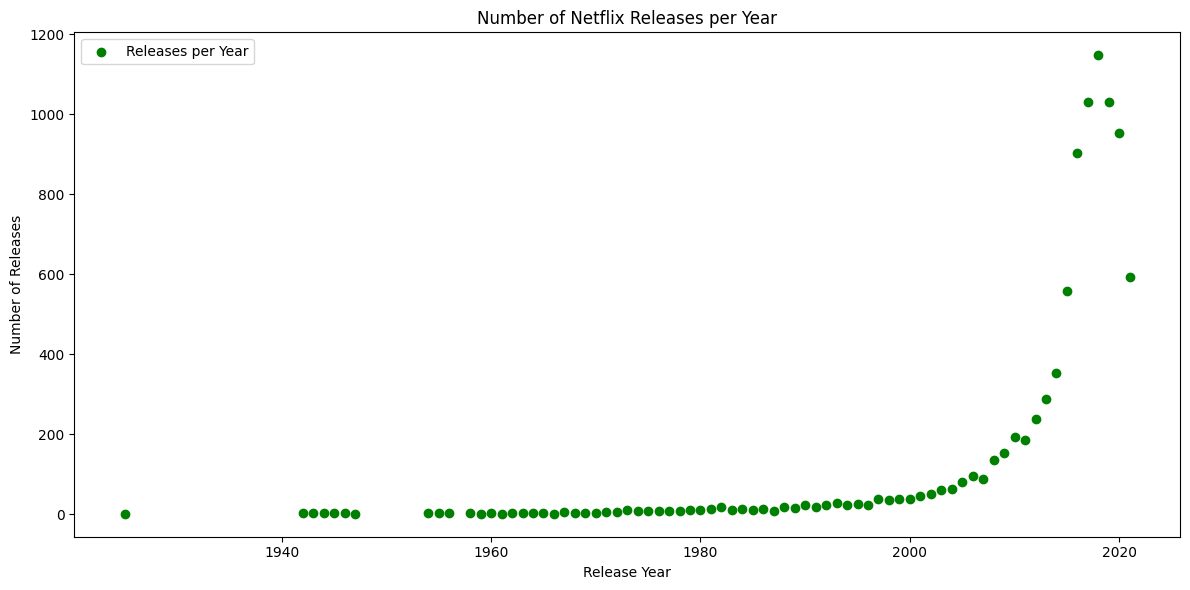

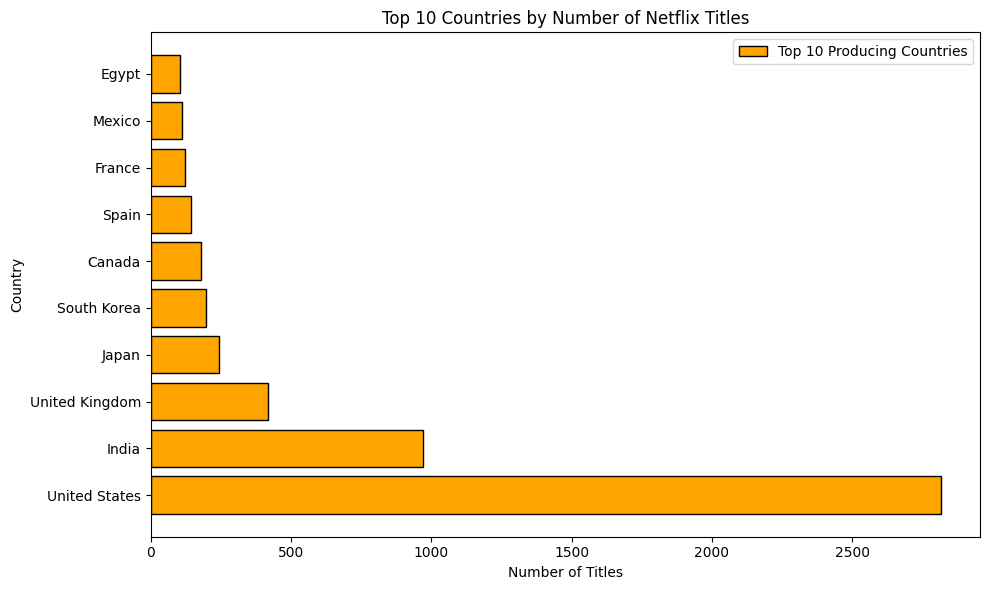

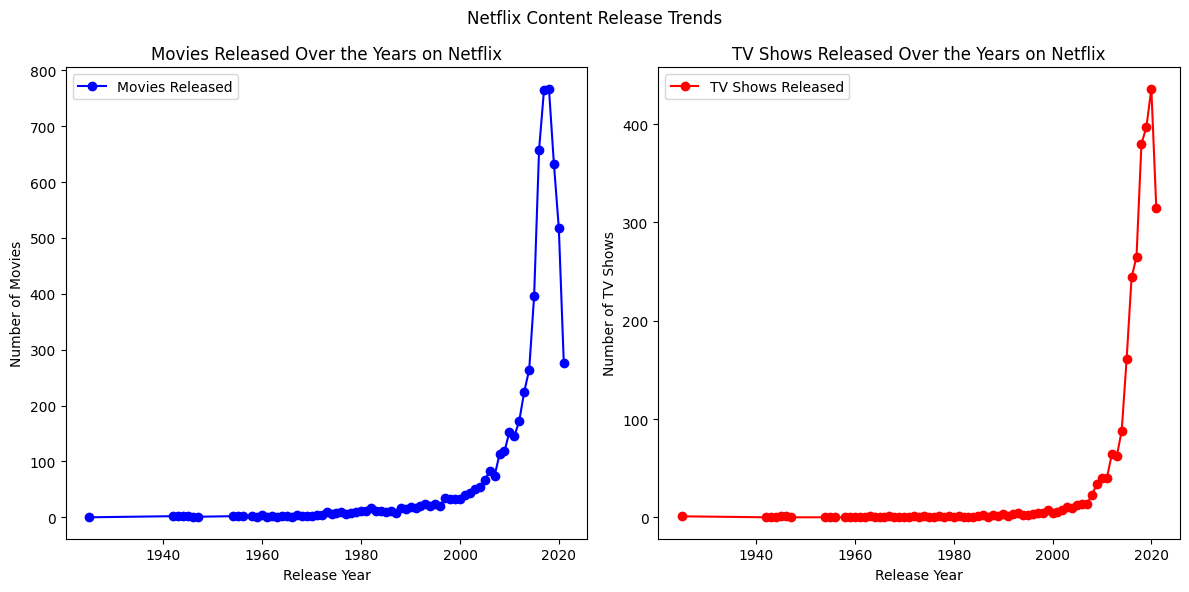

In [18]:
 # Load the dataset
df = pd.read_csv('netflix_titles.csv')
#clean data
df = df.dropna(subset=['type', 'release_year', 'rating', 'duration'])

type_Count = df['type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(type_Count.index, type_Count.values, color=['skyblue', 'salmon'] , edgecolor='black', label='No.of Movies and TV Shows')
plt.title('Number of Movies vs TV Shows on Netflix')
plt.legend()
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Movies_vs_TV_Shows.png', dpi=300, bbox_inches='tight')  # Save 
plt.show()


rating_Count = df['rating'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(rating_Count.values, labels=rating_Count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Ratings on Netflix')
plt.tight_layout()
plt.savefig('Content_Ratings_Distribution.png', dpi=300, bbox_inches='tight')  # Save 
plt.show() 


movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
plt.hist(movie_df['duration'], bins=30, color='purple', edgecolor='black', label='Movie Durations')
plt.title('Distribution of Movie Durations on Netflix')
plt.legend()
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('Movie_Duration_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()


release_year_Count = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.scatter(release_year_Count.index, release_year_Count.values, color='green', label='Releases per Year')
plt.title('Number of Netflix Releases per Year')
plt.legend()
plt.xlabel('Release Year')  
plt.ylabel('Number of Releases')
plt.tight_layout()
plt.savefig('Netflix_Releases_per_Year.png', dpi=300, bbox_inches='tight')
plt.show()


country_Count = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.barh(country_Count.index, country_Count.values, color='orange', edgecolor='black', label='Top 10 Producing Countries')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.legend()
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top_10_Countries_Netflix_Titles.png', dpi=300, bbox_inches='tight')
plt.show()



content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fix, ax = plt.subplots(1,2 ,figsize=(12, 6))
#fist subplot : movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], marker='o', color='blue', label='Movies Released')
ax[0].set_title('Movies Released Over the Years on Netflix')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Number of Movies')
ax[0].legend()

#second subplot : tv shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], marker='o', color='red', label='TV Shows Released')
ax[1].set_title('TV Shows Released Over the Years on Netflix')
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Number of TV Shows')
ax[1].legend()

fix.suptitle('Netflix Content Release Trends')
plt.tight_layout()
plt.savefig('Netflix_Content_Release_Trends.png', dpi=300, bbox_inches='tight')
plt.show()  

